# **Evaluation - Problem 1**

In [116]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from tqdm import tqdm
import os
import sys
import json


# select current working directory and subfolder to save the files
current_directory = os.getcwd()
subfolder_path = 'data'

# select file path for standardroutes
file_path = os.path.join(current_directory, subfolder_path, 'standard.json')
with open(file_path, 'r') as file:
    standardroutes_old = json.load(file) #yaml.safe_load(file)

# select file path for actual routes
file_path = os.path.join(current_directory, subfolder_path, 'actual.json')
with open(file_path, 'r') as file:
    actual_routes_old = json.load(file)

# run another notebook to load the function compute_similarities() to compute the similarity scores for each standardroute-actual-route-pair
# this notebook also runs the notebook for data generation to load the function show_route() to visualize routes which is part of the similarity score functions
%run "functions_similarity_score.ipynb"

Functions for data generation successfully loaded.
Functions for similarity score computations successfully loaded.


# **A: Original Standardroutes**

In [117]:
similarity_scores_old = compute_similarites(input_sr=standardroutes_old, input_ar=actual_routes_old, prints=False)

Processing: 100%|██████████| 100000/100000 [01:03<00:00, 1585.79iteration/s]



All scores successfully computed.
Mean similarity score: 0.8033


### **Analyse the similarity scores**

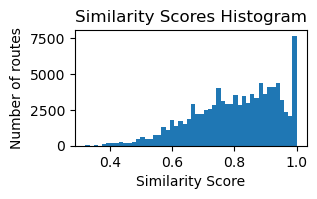

[{'id': 'a1', 'driver': 'H', 'sroute': 's1', 'score': 0.9637096774193549},
 {'id': 'a2', 'driver': 'F', 'sroute': 's1', 'score': 1.0},
 {'id': 'a3', 'driver': 'I', 'sroute': 's1', 'score': 0.6176299073206291},
 {'id': 'a4', 'driver': 'G', 'sroute': 's1', 'score': 0.7343672554967386},
 {'id': 'a5', 'driver': 'F', 'sroute': 's1', 'score': 0.8785103785103785},
 {'id': 'a6', 'driver': 'A', 'sroute': 's1', 'score': 0.8669354838709677},
 {'id': 'a7', 'driver': 'J', 'sroute': 's1', 'score': 0.6488095238095238},
 {'id': 'a8', 'driver': 'F', 'sroute': 's1', 'score': 0.9758064516129032},
 {'id': 'a9', 'driver': 'E', 'sroute': 's1', 'score': 0.5779569892473119},
 {'id': 'a10', 'driver': 'A', 'sroute': 's1', 'score': 1.0}]

In [118]:
# plot a histogram to show the distribution of the similarity scores between 0 and 1
values = np.array([i['score'] for i in similarity_scores_old])
plt.figure(figsize=(3, 1.5))
plt.hist(values, density=False, bins=50)
plt.ylabel('Number of routes')
plt.xlabel('Similarity Score')
plt.title('Similarity Scores Histogram')
plt.show()

# view first 10 combinations
similarity_scores_old[:10]

In [119]:
# check if any similarity is zero and view the combinations with less than 0.3 similarity score
print('Is any similarity score zero:', np.any(values == 0))
#display([i for i in values if i < 0.3][:10])

# view the combination with the lowest similarity score
idx_min = np.argmin(values)
lowest_score = [i for i in similarity_scores_old if i['id'] == str('a' + str(idx_min+1))][0]
standardroute = [i for i in standardroutes_old if i['id'] == lowest_score['sroute']][0]
actual_route = [i for i in actual_routes_old if i['id'] == lowest_score['id']][0]
print("\nLowest score by standardroute '{}' and actual route '{}' from driver '{}' with {} similarity.".format(standardroute['id'], actual_route['id'], actual_route['driver'], np.round(np.min(values), 4)))

# view details
#fun_similarity_score(route1=standardroute, route2=actual_route, prints=True)

Is any similarity score zero: False

Lowest score by standardroute 's15' and actual route 'a70002' from driver 'J' with 0.3212 similarity.


**View the similarity scores for each standardroute separately**


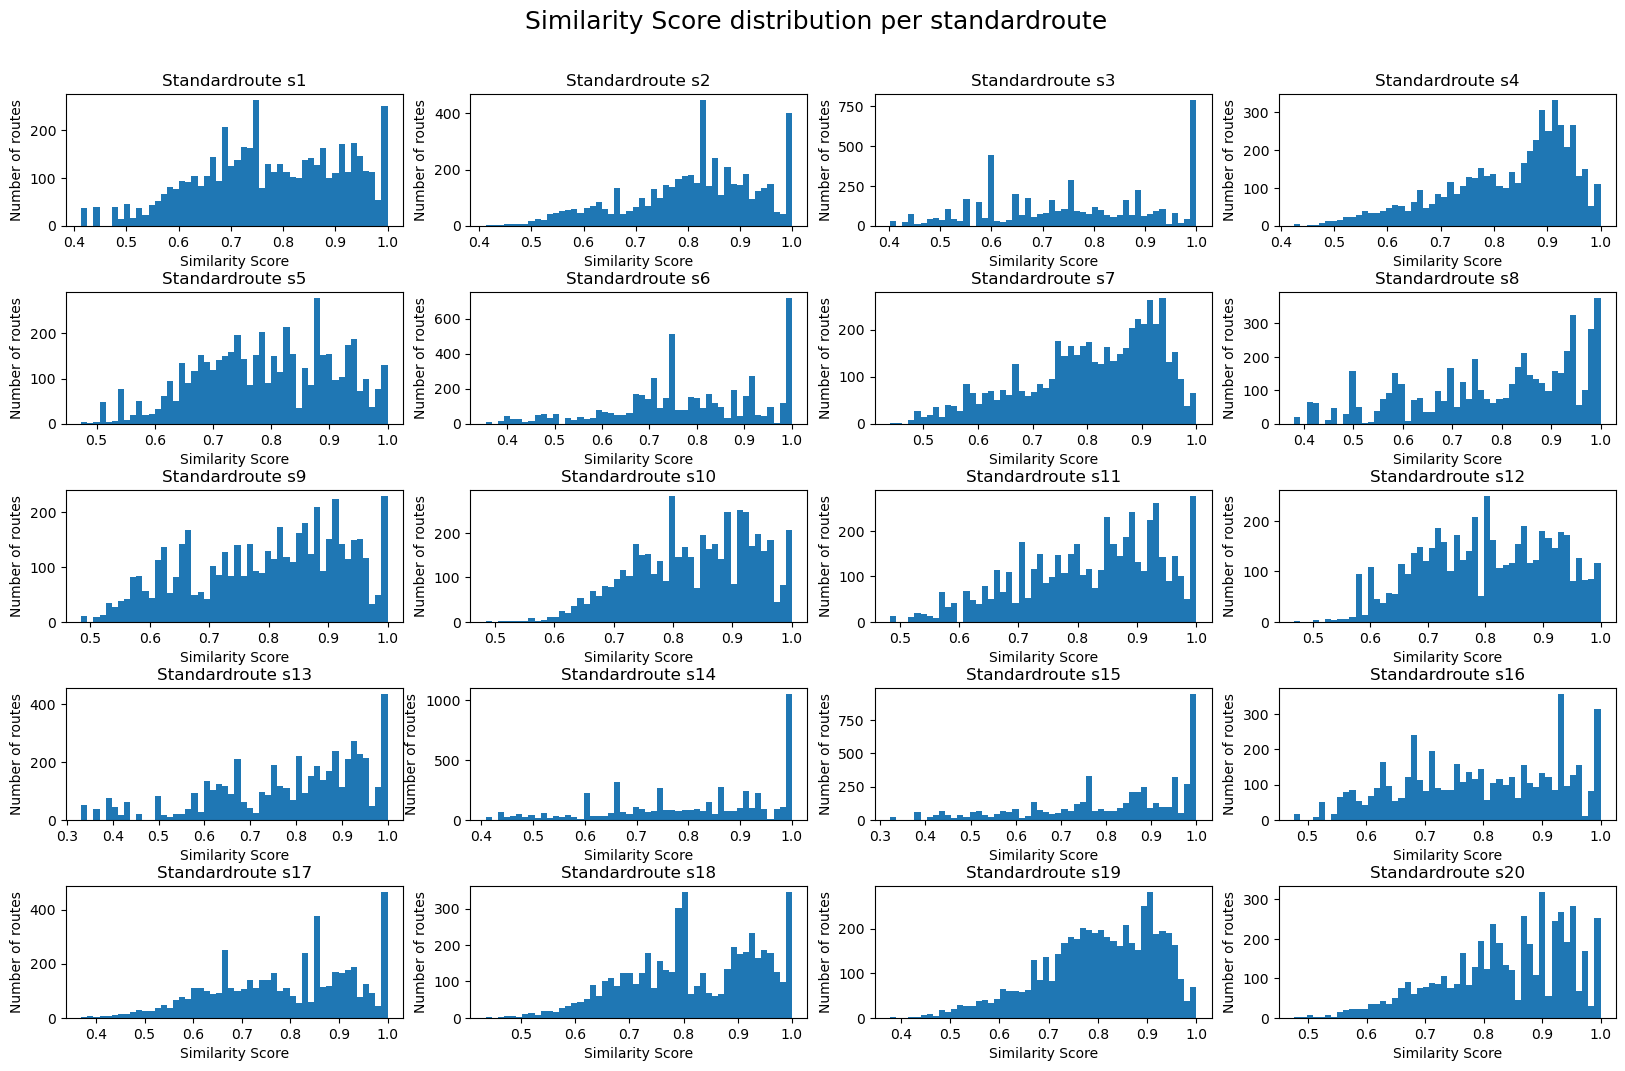

In [120]:
# plot a histogram for every standardroute to show the distribution
standardroute_ids = [i['id'] for i in standardroutes_old]

# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per standardroute", fontsize=18, y=0.95)

# loop through standardroutes and axes
for id, ax in zip(standardroute_ids, axs.ravel()):
    values = [i['score'] for i in similarity_scores_old if i['sroute'] == id]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'Standardroute {id}')

plt.show()

**View the similarity scores for each driver separately**

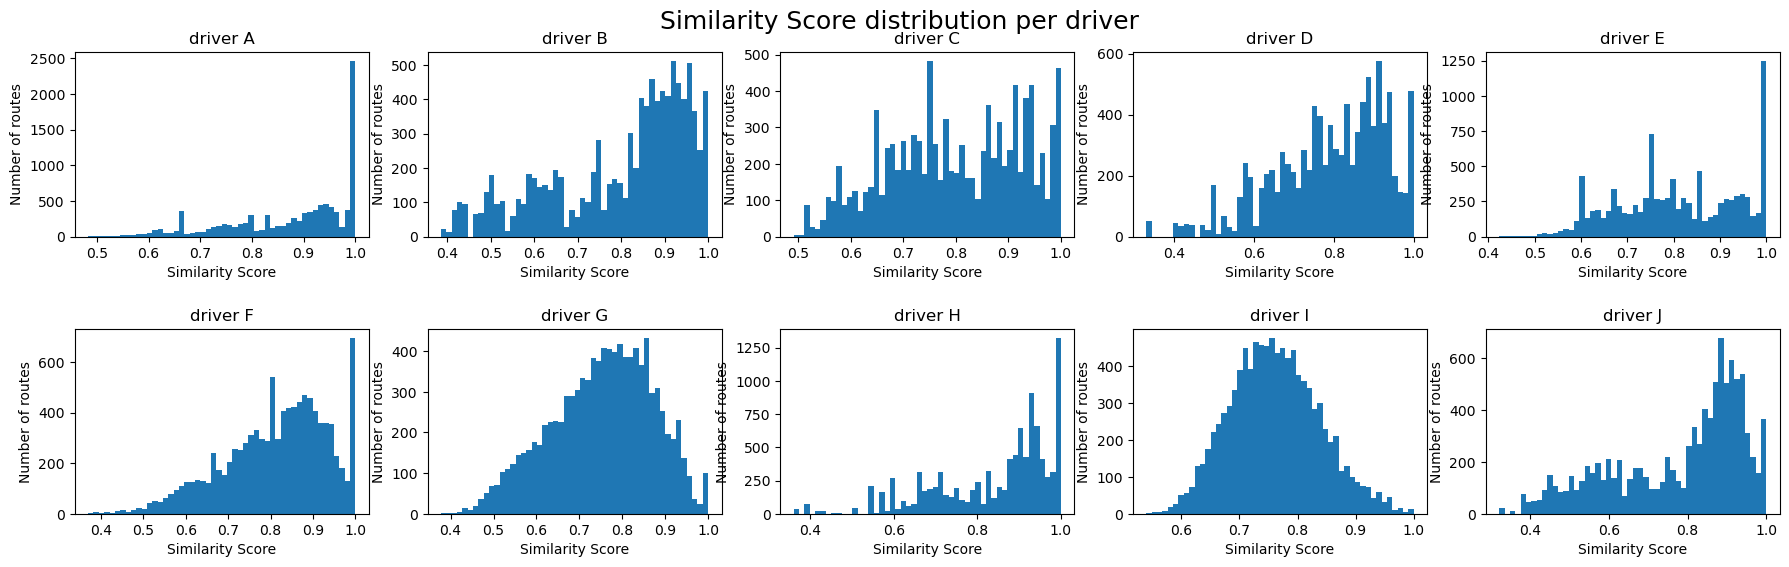

In [121]:
# plot a histogram for every driver to show the distribution
drivers = np.sort(list(set([i['driver'] for i in actual_routes_old])))

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per driver", fontsize=18, y=0.95)

# loop through drivers and axes
for driver, ax in zip(drivers, axs.ravel()):
    values = [i['score'] for i in similarity_scores_old if i['driver'] == driver]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'driver {driver}')

plt.show()

In [122]:
del actual_routes_old
del similarity_scores_old
#sys.exit()

# **B: Recommended Standardroutes**
**Load the data**

In [123]:
# # select file path for the recommended standardroutes
# file_path = os.path.join(current_directory, subfolder_path, 'recStandard.json')
# with open(file_path, 'r') as file:
#     standardroutes_new = json.load(file)

# select file path for the parameter dictionary
file_path = os.path.join(current_directory, subfolder_path, 'parameter_dictionary.json')
with open(file_path, 'r') as file:
    parameter_dictionary = json.load(file)

# assign each value to its name in order to be able to use them as variables
for key, value in parameter_dictionary.items():
    if key == 'df_drivers_attributes': locals()[key] = pd.DataFrame(value)
    else: locals()[key] = value

### **Create the same amount of actual routes again with the recommended standardroutes and compute similarity scores**

In [124]:
# create new actual routes
standardroutes_new = standardroutes_old #delete line if recommended standardroutes are available
actual_routes_new = fun_aroutes(input_sr=standardroutes_new, p=0.5, ep=0.3, prints=False)
 
# compute new similarity scores
similarity_scores_new = compute_similarites(input_sr=standardroutes_new, input_ar=actual_routes_new, prints=False)

Processing: 100%|██████████| 100000/100000 [01:07<00:00, 1481.41iteration/s]



All scores successfully computed.
Mean similarity score: 0.8057


### **Analyse the similarity scores**

**View the similarity scores for each standardroute separately**


**View the similarity scores for each driver separately**

In [125]:
del actual_routes_new

#sys.exit()

# **Evaluation - Problem 2**

### **Check whether the attributes of each driver are visible in the recommended standardroutes**

In [126]:
# # select file path for recommended standardroutes of the drivers
# subfolder_path = 'Solutions'
# file_path = os.path.join(current_directory, subfolder_path, 'driver.json')
# with open(file_path, 'r') as file:
#     rec_drivers = json.load(file)

# rec_drivers

In [127]:
display(df_drivers_attributes, driver_cities, driver_products)

,likes short routes,likes long routes,likes a city,dislikes a city,likes few products,likes many products,likes a product,dislikes a product,likes high quantities,likes low quantities
driver_A,Yes,-,-,-,Yes,-,-,-,-,-
driver_B,-,Yes,-,-,-,-,-,-,Yes,-
driver_C,-,-,Yes,-,-,-,-,Yes,-,-
driver_D,-,-,-,Yes,-,-,-,-,-,Yes
driver_E,-,-,Yes,-,Yes,-,-,-,-,-
driver_F,Yes,-,-,-,-,Yes,-,-,-,-
driver_G,Yes,-,-,-,-,-,Yes,-,-,-
driver_H,-,-,-,Yes,-,-,-,Yes,-,-
driver_I,-,-,-,-,-,-,Yes,-,Yes,-
driver_J,-,Yes,-,-,-,-,-,-,-,Yes


{'driver_C': ['Trento', 'Verona'],
 'driver_D': ['Milano', 'Venezia', 'Lecce'],
 'driver_E': ['Rome', 'Padua'],
 'driver_H': ['Lecce', 'Palermo', 'Udine']}

{'driver_C': ['Water', 'Milk', 'Fish'],
 'driver_G': ['Beer', 'Cheese'],
 'driver_H': ['Bananas', 'Bread', 'Tomatoes'],
 'driver_I': ['Chocolate', 'Honey']}

### **Compare Similarity Scores**

**Get similarity scores for each driver with original standardroutes**

In [128]:
# dictionary to store the mean similarity score for each driver (given all new standardroutes)
sim_scores_drivers = {}

# loop to get for each driver the actual routes computed with all new standardroutes and compute the mean similarity
for driver in drivers:

    # extract the driver's similarity scores of all the similarity scores computed before
    sim_scores_driver = [i for i in similarity_scores_new if i['driver'] == driver]

    # compute the mean similarity score of all scores for the driver
    mean_sim_score_driver = np.mean([i['score'] for i in sim_scores_driver])

    # append the driver id and mean score to the dictionary
    sim_scores_drivers.update({driver: mean_sim_score_driver})

# view results
sim_scores_drivers

{'A': 0.8809099209270692,
 'B': 0.800596887002499,
 'C': 0.8110947170456111,
 'D': 0.7887357061234358,
 'E': 0.8102421341264812,
 'F': 0.815039399095,
 'G': 0.7541793274695229,
 'H': 0.8507740726528605,
 'I': 0.7617712695526099,
 'J': 0.7832658541747892}

**Create new actual routes for each driver with only his 5 recommended standardroutes and compute the mean similarity scores**

In [129]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 200

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route * 5 #5 recommended standardroutes for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 1000
Number of actual routes in total: 10000


In [130]:
# dictionary to store the mean similarity score for each driver (given only the 5 recommended standardroutes)
rec_sim_scores_drivers = {}

# loop to create for each driver new actual routes with its 5 recommended standardroutes and compute the mean similarity
for driver in tqdm(drivers):
    
    # select the 5 recommended standardroutes for the driver
    rec_standardroutes = standardroutes_old[:5] #delete line if real recommended standardroutes are available
    #rec_standardroutes = rec_drivers[driver]

    # create the actual routes for the driver
    actual_routes_driver = fun_aroutes(input_sr=rec_standardroutes, driver_given=driver, p=0.5, ep=0.3, prints=False, bar=False)

    # compute the similarity scores of all the just generated actual routes of the driver with its corresponding 5 recommended standardroutes for the driver
    sim_scores_driver = compute_similarites(input_sr=rec_standardroutes, input_ar=actual_routes_driver, prints=False, bar=False)

    # compute the mean similarity score of all scores for the driver
    mean_sim_score_driver = np.mean([i['score'] for i in sim_scores_driver])

    # append the driver id and mean score to the dictionary
    rec_sim_scores_drivers.update({driver: mean_sim_score_driver})

100%|██████████| 10/10 [00:15<00:00,  1.58s/it]


**Plot results**

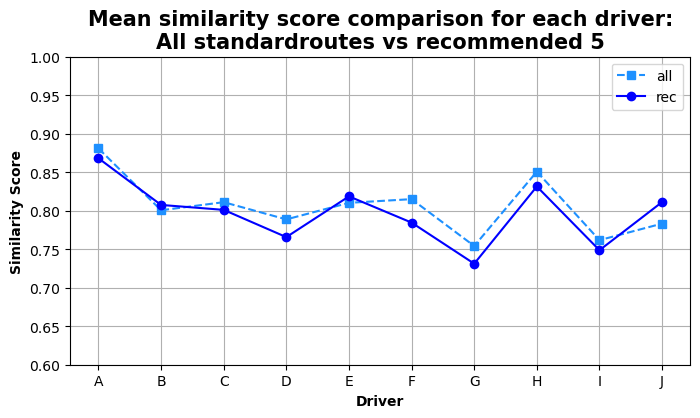

In [131]:
# create plot to compare similarity scores
plt.figure(figsize=(8, 4))
plt.plot(drivers, sim_scores_drivers.values(), marker='s', linestyle='--', color='dodgerblue', label='all')
plt.plot(drivers, rec_sim_scores_drivers.values(), marker='o', linestyle='-', color='blue', label='rec')

# set title, edit axis and add legend
plt.title('Mean similarity score comparison for each driver:\nAll standardroutes vs recommended 5', fontsize=15, fontweight='bold')
plt.ylabel('Similarity Score', fontsize=10, fontweight='bold')
plt.xlabel('Driver', fontsize=10, fontweight='bold')
plt.ylim([0.6, 1])
plt.legend(loc='upper right')

# grid lines
plt.grid(True)

plt.show()

In [132]:
sys.exit()

SystemExit: 

C:\Users\Dennis\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# **Evaluation - Problem 3**

In [ ]:
# # select file path for recommended standardroutes
# file_path = os.path.join(current_directory, subfolder_path, 'perfectRoute.json')
# with open(file_path, 'r') as file:
#     perfectRoute = json.load(file)

In [ ]:
# define how many actual routes should be created for each of the 5 standardroutes for each driver
jobs_per_route = 100

# calculate the amount of actual routes per driver and in total
number_of_actual_routes = jobs_per_route #only one perfect route for each driver
print('Number of actual routes per driver: {}'.format(number_of_actual_routes))
print('Number of actual routes in total: {}'.format(number_of_actual_routes*len(drivers)))

Number of actual routes per driver: 100
Number of actual routes in total: 1000


**Create new actual routes for each driver with his perfect route and compute the mean similarity scores**

In [ ]:
# dictionary to store the mean similarity score for each driver
perfect_sim_scores_drivers = {}

# loop to create for each driver new actual routes with its perfect standardroute and compute the similarity
#for driver in drivers:
    #perfect_standardroute = perfectRoute[driver]

In [ ]:
#plot